In [3]:
import numpy as np  
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("poster")
sns.set_style("whitegrid")
%config InlineBackend.figure_format='retina'
import pymc as pm
import arviz as az

np.set_printoptions(formatter={'float': lambda x: "{0:0.1f}%".format(x)})

In [2]:
np.random.seed(3)

## Generate Data

In [4]:
a = stats.bernoulli(p=.1)
b = stats.bernoulli(p=.15)

a_conversions = a.rvs(100)
b_conversions = b.rvs(100)

In [5]:
a_conversions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [6]:
b_conversions

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [7]:
np.mean(a_conversions)

0.07

In [8]:
np.mean(b_conversions)

0.17

## Prior Distribution

## Building conversion rate model

In [9]:
with pm.Model():
    conversion_rate = pm.Beta('conversion_rate', alpha=2, beta=10)
    likelihood = pm.Bernoulli("likelihood", p=conversion_rate, observed=a_conversions)
    
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [conversion_rate]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.


In [10]:
conversion_a = idata.posterior.stack(draws=("chain", "draw"))["conversion_rate"].values

In [11]:
np.round(100 * conversion_a, 2)[:200]

array([13.1%, 10.6%, 13.7%, 9.8%, 10.0%, 10.0%, 9.1%, 6.7%, 6.3%, 5.8%,
       10.8%, 8.5%, 8.5%, 10.6%, 5.0%, 4.8%, 5.9%, 11.5%, 12.9%, 9.8%,
       5.7%, 4.5%, 4.5%, 7.9%, 10.3%, 9.6%, 9.6%, 9.2%, 9.2%, 12.3%, 9.7%,
       12.2%, 3.7%, 9.7%, 8.4%, 5.8%, 8.0%, 8.0%, 6.8%, 6.8%, 6.8%, 6.8%,
       7.0%, 6.3%, 7.5%, 7.5%, 7.3%, 7.3%, 7.3%, 7.6%, 7.7%, 6.1%, 4.2%,
       6.0%, 7.4%, 7.1%, 9.6%, 10.5%, 7.8%, 7.4%, 7.8%, 8.7%, 7.9%, 8.1%,
       7.0%, 7.2%, 8.1%, 5.5%, 7.8%, 5.9%, 7.8%, 8.5%, 7.9%, 8.6%, 5.4%,
       6.4%, 6.2%, 7.5%, 9.8%, 9.8%, 11.4%, 4.8%, 6.2%, 5.3%, 3.6%, 5.7%,
       6.5%, 7.6%, 7.5%, 9.1%, 9.1%, 10.0%, 4.3%, 5.9%, 6.5%, 6.5%, 7.3%,
       7.1%, 9.7%, 9.1%, 13.7%, 10.6%, 5.7%, 6.2%, 7.1%, 6.3%, 6.9%, 8.2%,
       12.0%, 10.1%, 9.5%, 13.7%, 7.0%, 6.7%, 4.8%, 7.1%, 6.8%, 3.1%,
       12.1%, 6.3%, 12.6%, 12.7%, 11.4%, 11.8%, 9.5%, 16.7%, 7.5%, 10.8%,
       10.3%, 10.3%, 6.3%, 5.5%, 4.8%, 3.8%, 4.5%, 7.8%, 4.2%, 7.2%, 9.5%,
       6.0%, 5.3%, 10.1%, 8.2%, 8.2%, 11.8%, 3

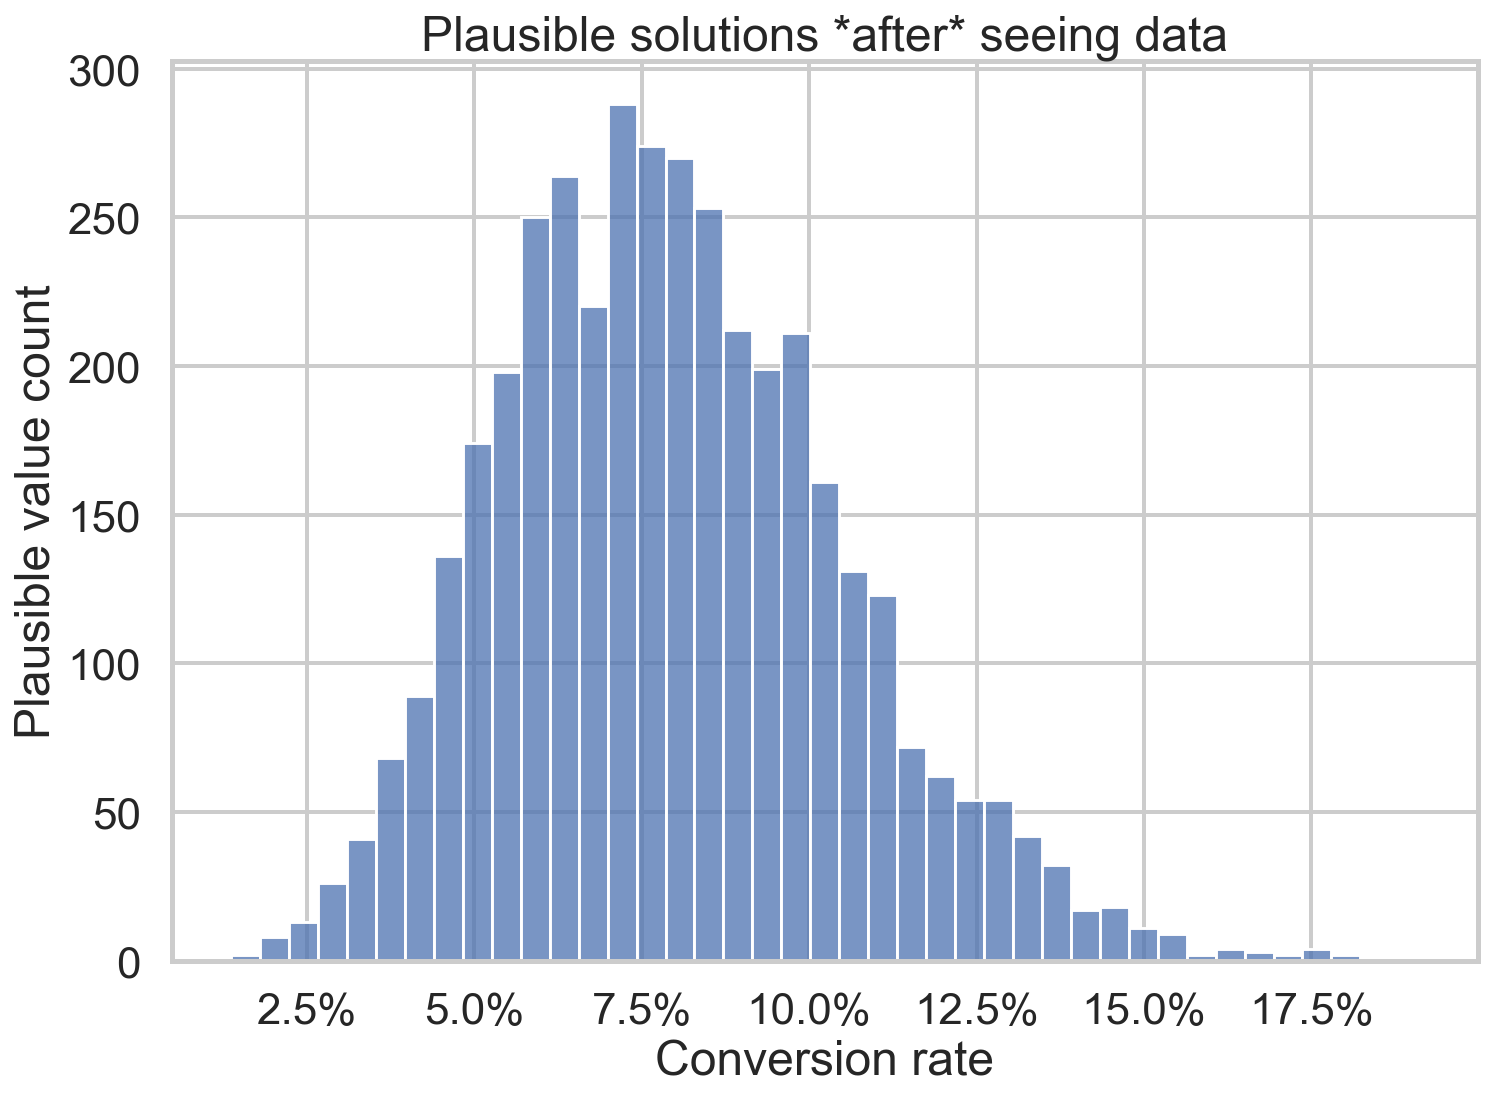

In [33]:
ax = sns.histplot(conversion_a)
ax.set_xlabel("Conversion rate")
ax.set_ylabel("Plausible value count")
ax.set_title("Plausible solutions *after* seeing data")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

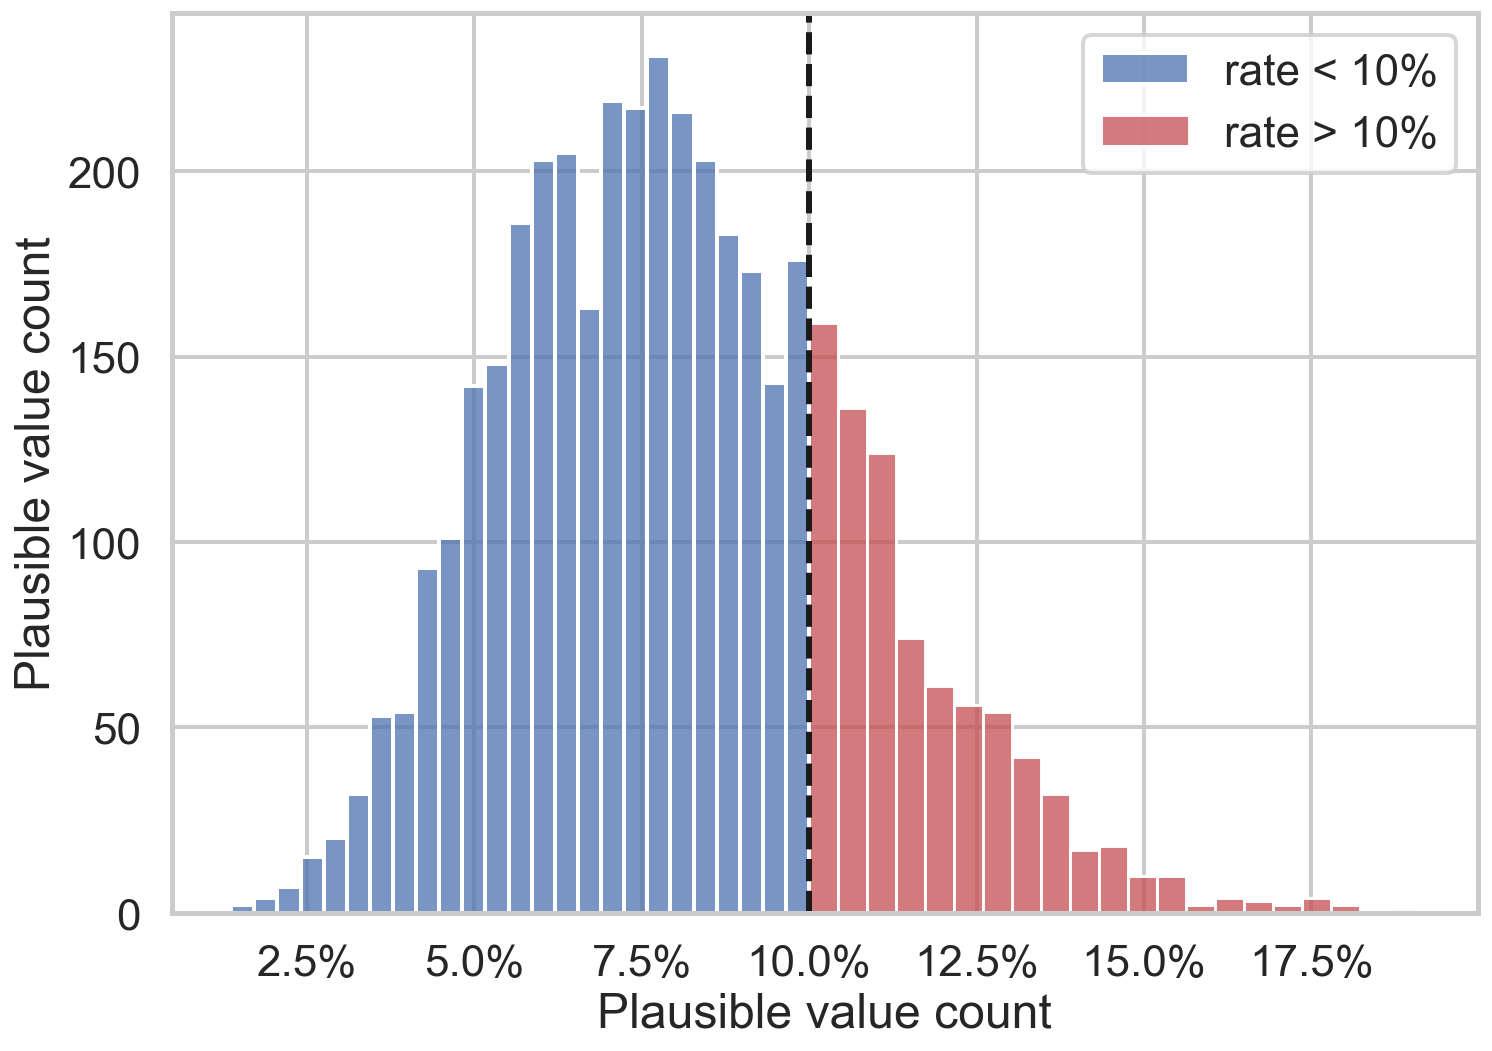

In [35]:
ax = sns.histplot(conversion_a[conversion_a < .1], label="rate < 10%")
sns.histplot(conversion_a[conversion_a > .1], color="r", label="rate > 10%", ax=ax)
ax.set_xlabel("Plausible value count")
ax.set_ylabel("Plausible value count")
ax.axvline(.1, color="k", linestyle="--")
ax.legend()

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

In [36]:
np.mean(conversion_a < .1)

0.79725